# Car Price Prediction

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


# 1. Data understanding and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float", "{:.2f}".format)

In [2]:
data = pd.read_csv('data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


## `car_ID`

In [5]:
data.car_ID.nunique()

205

In [6]:
data.set_index('car_ID', inplace=True)
data.index.name = None
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


## `price`

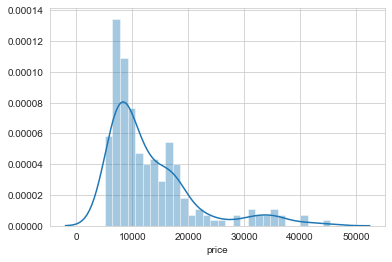

In [7]:
sns.distplot(data.price, bins=30)

## `symboling`

symboling: -2 (least risky) to +3 most risky. Most cars are 0, 1, 2

In [8]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [9]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

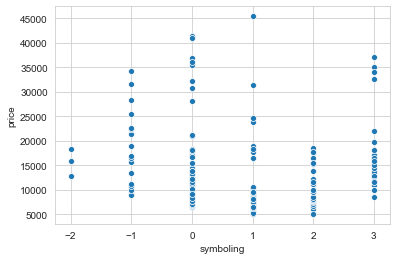

In [10]:
sns.scatterplot('symboling', 'price', data=data)

## `CarName`

In [11]:
data.CarName.nunique()

147

In [12]:
data['brand'] = data.CarName.str.split(' ', expand=True)[0].str.lower()

data['brand'] = data.brand.str.replace('toyouta', 'toyota')
data['brand'] = data.brand.str.replace('porcshce', 'porsche')
data['brand'] = data.brand.str.replace('maxda', 'mazda')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')

data.brand.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64

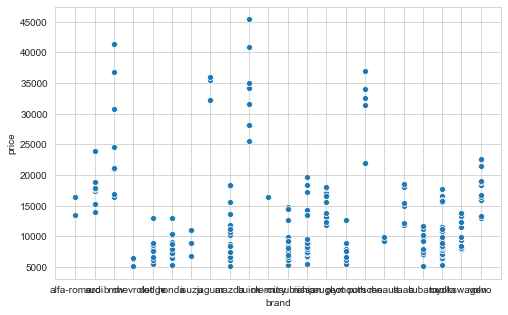

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot('brand', 'price', data=data)

## `fueltype`, `fuelsystem`, `aspiration`, `doornumber`, `carbody`, `drivewheel`

In [14]:
data['compressionratio'] = data.compressionratio.round()

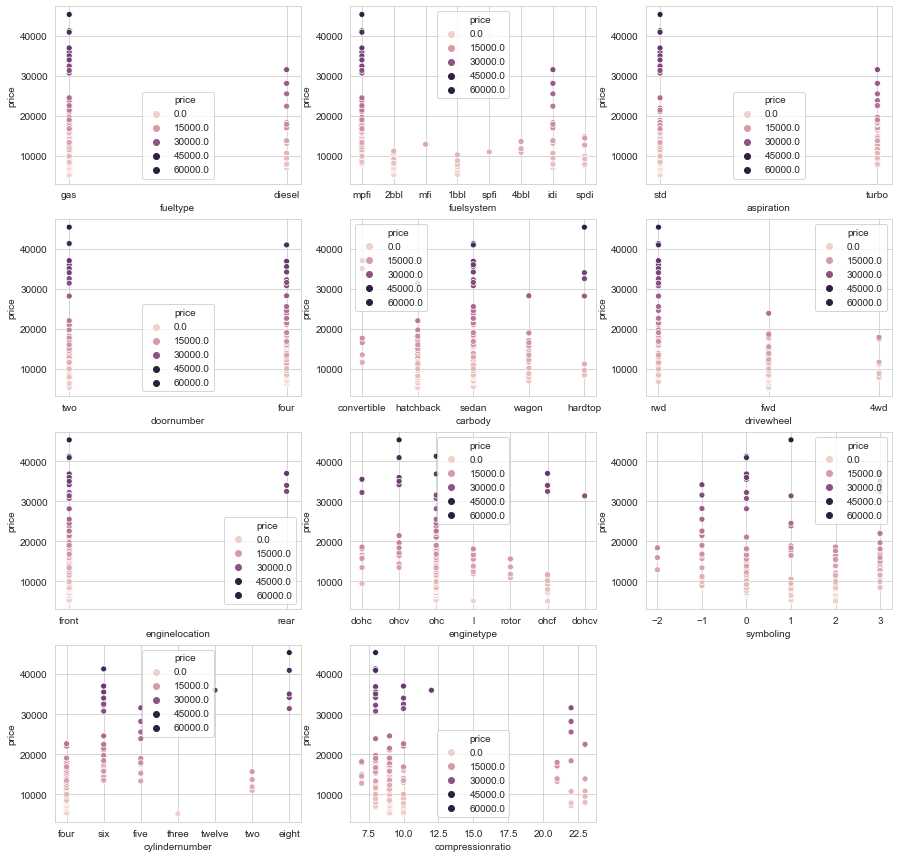

In [23]:
discrete_col = ['fueltype', 'fuelsystem', 'aspiration', 'doornumber', 'carbody', 
                'drivewheel', 'enginelocation', 'enginetype', 'symboling', 
                'cylindernumber', 'compressionratio']
plt.figure(figsize=(15, 15))
for i, column in enumerate(discrete_col, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

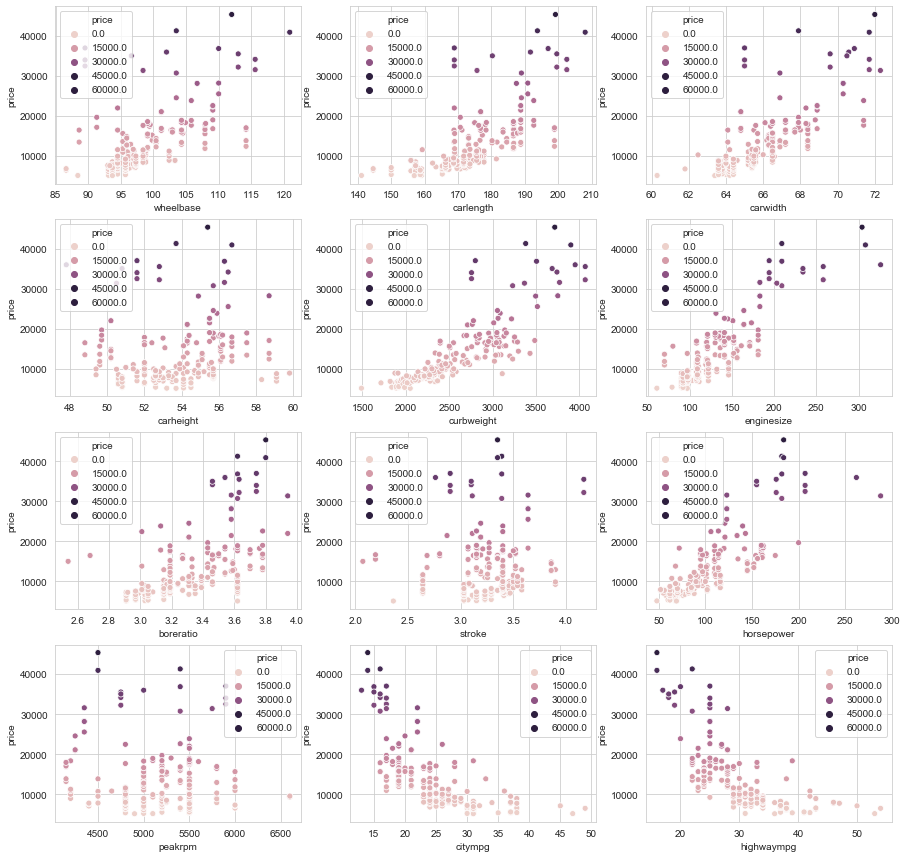

In [24]:
continous_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_col, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

In [115]:
data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [141]:
data.peakrpm.value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
5800     7
4500     7
4150     5
4200     5
5100     5
4350     4
4750     4
4250     3
4400     3
5900     3
6600     2
5750     1
5300     1
4650     1
4900     1
5600     1
Name: peakrpm, dtype: int64

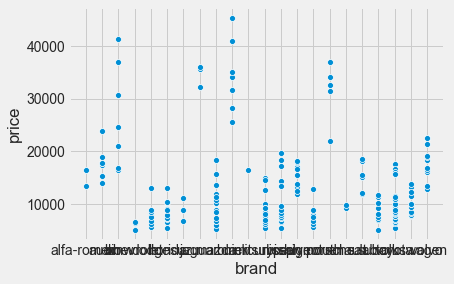

In [145]:
sns.scatterplot('brand', 'price', data=data)

In [137]:
columns.remove('horsepower')

In [138]:
columns

['peakrpm', 'citympg', 'highwaympg', 'brand']

In [ ]:
continous_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [ ]:
continous_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
sns.pairplot(data[continous_col], hue='price')